# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [177]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_boston, load_iris #datasets
from sklearn.model_selection import train_test_split #tts
from sklearn.linear_model import LinearRegression, LogisticRegression # {lr: reg models, log: classif models}
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # regression model
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix # classif model

## Regression Model Evaluation

In [178]:
data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)
print(load_boston().get('DESCR'))
data.dtypes

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [180]:
print(len(X_train))
print(len(X_test))

404
102


In [181]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [182]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_predtrain = lr.predict(X_train)
y_predtest = lr.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [183]:
r2_train = r2_score(y_train,y_predtrain)
r2_test = r2_score(y_test,y_predtest)
print(r2_train)
print(r2_test)

0.7483533021678197
0.7026489319525115


## 4. Calculate and print mean squared error for both the training and the testing set.

In [184]:
print(mean_squared_error(y_train,y_predtrain))
print(mean_squared_error(y_test,y_predtest))

21.215532390381096
25.163028608440136


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [185]:
print(mean_absolute_error(y_train,y_predtrain))
print(mean_absolute_error(y_test,y_predtest))

3.2145107266696114
3.5729461658416324


## Classification Model Evaluation

In [186]:
data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

df1 = pd.concat([X, y], axis=1)

In [187]:
print(data.get('DESCR'))

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [188]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120, 1)
(30, 1)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [190]:
log = LogisticRegression(max_iter=10000)
log.fit(X= X_train, y = y_train)

/usr/local/Caskroom/miniconda/base/envs/ironhack/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(max_iter=10000)

In [191]:
y_predtrain = log.predict(X_train)
y_predtest = log.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [192]:
accuracy_score(
    y_true= y_train,
    y_pred = y_predtrain
)

0.9666666666666667

In [193]:
accuracy_score(
    y_true= y_test,
    y_pred = y_predtest
)

1.0

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [194]:
balanced_accuracy_score(
    y_true= y_train,
    y_pred = y_predtrain
)

0.9661084529505581

In [195]:
balanced_accuracy_score(
    y_true= y_test,
    y_pred = y_predtest
)

1.0

## 10. Calculate and print the precision score for both the training and the testing set.

In [196]:
precision_score(
    y_true= y_train,
    y_pred = y_predtrain, 
    average='macro'
)

0.9690016103059582

In [197]:
precision_score(
    y_true= y_test,
    y_pred = y_predtest,
    average='macro')

1.0

## 11. Calculate and print the recall score for both the training and the testing set.

In [198]:
recall_score(
    y_true= y_train,
    y_pred = y_predtrain,
    average='macro'
)

0.9661084529505581

In [199]:
recall_score(
    y_true= y_test,
    y_pred = y_predtest,
    average='macro'
    )

1.0

## 12. Calculate and print the F1 score for both the training and the testing set.

In [200]:
f1_score(
    y_true= y_train,
    y_pred = y_predtrain,
    average='macro'
)

0.9671671671671671

In [201]:
f1_score(
    y_true= y_test,
    y_pred = y_predtest,
    average='macro'
)

1.0

In [202]:
f1_score(
    y_true= y_train,
    y_pred = y_predtrain,
    average='macro'
)

0.9671671671671671

In [203]:
f1_score(
    y_true= y_test,
    y_pred = y_predtest,
    average='macro'
)

1.0

## 13. Generate confusion matrices for both the training and the testing set.

In [204]:
conf_train = confusion_matrix(y_train, y_predtrain)
conf_train

array([[38,  0,  0],
       [ 0, 35,  3],
       [ 0,  1, 43]])

In [205]:
pd.crosstab(
    y_true= y_train,
    y_pred = y_predtrain
)

TypeError: crosstab() got an unexpected keyword argument 'y_true'

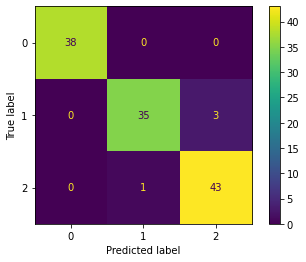

In [206]:
disp_train = ConfusionMatrixDisplay(confusion_matrix= conf_train)
disp_train.plot()

In [207]:
conf_test = confusion_matrix(y_test, y_predtest)
conf_test

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  0,  6]])

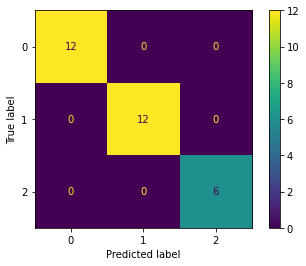

In [208]:
disp_test = ConfusionMatrixDisplay(confusion_matrix= conf_test)
disp_test.plot()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.